In [130]:
#imports
import pandas as pd

In [131]:
data_is_here = '../data/chennai.csv'
df = pd.read_csv(data_is_here)

In [132]:
df.shape

(7109, 22)

In [133]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [135]:
#The number unique values for each column 
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

### 1. Data Cleaning

In [136]:
## Checking null values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [137]:
missing_values_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_values_percentage

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

##### It's evident that missing values exist in 3 columns <br/>
QS_OVERALL : 0.67%, N_BATHROOM : 0.07%, N_BEDROOM  : 0.01%


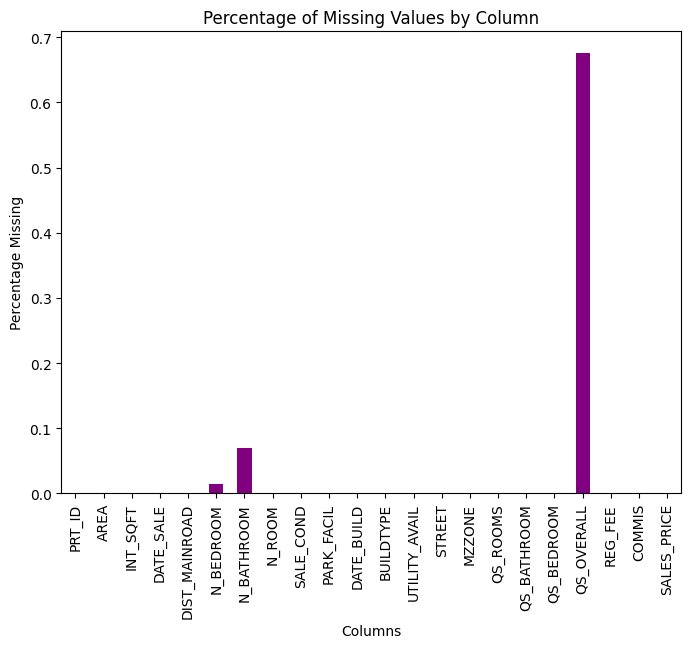

In [138]:
## below bar chart demostrates the same / we can heatmap as well
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.show()

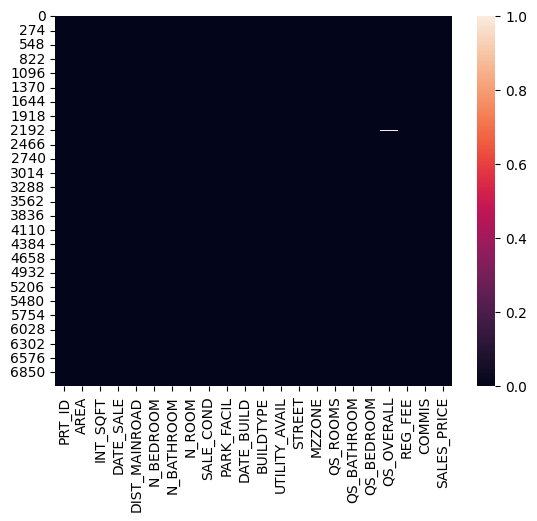

In [139]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [140]:
## Now we need to fill missing Values
df.N_BATHROOM.isnull().sum()

5

In [141]:
df.N_BATHROOM.mode()

0    1.0
Name: N_BATHROOM, dtype: float64

In [142]:
df.N_BATHROOM.mean()

1.213260135135135

In [143]:
df.N_BATHROOM.median()

1.0

##### Let's fill missin N_BATHROOM values as 1 as shown by the median value and since the mean is 1.21 and the bathrooms can't be 1.21

In [144]:
df.N_BATHROOM.fillna(1,inplace=True)

In [145]:
## Likewise for N_BEDROOM
print(df.N_BEDROOM.isnull().sum())

1


In [146]:
df.N_BEDROOM.fillna(1,inplace=True)

In [147]:
print(df.N_BEDROOM.isnull().sum())

0


In [148]:
## For QS_OVERALL
df.QS_OVERALL.isnull().sum()

48

In [149]:
df.QS_OVERALL.mean()

3.5032537884152344

In [150]:
## let's QS with mean value
df.QS_OVERALL.fillna(3.50, inplace=True)

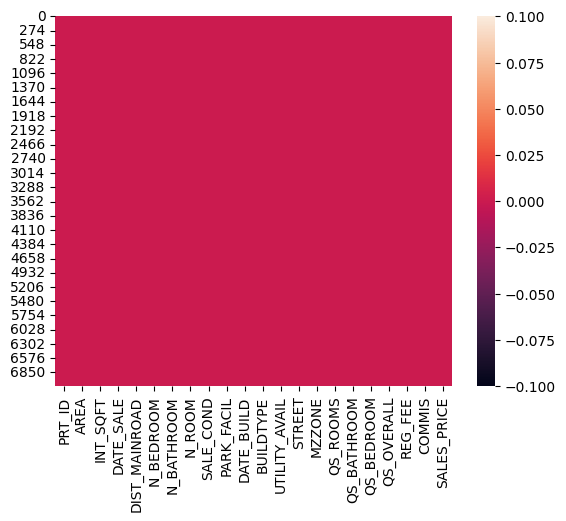

In [151]:
## see no more null values
sns.heatmap(df.isnull())
plt.show()

#### Next, Let's work witht the type of data we have <br/>
##### Let's focus on the Categorical & Numerical Columns

In [152]:
cat_col = df.select_dtypes('object')
cat_col

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Others,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


10 columns are cat columns

In [153]:
num_col = df.select_dtypes(exclude=['object'])
num_col

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000


12 columns are numeric columns

#### Let's focus on the Area Column, as we can see multiple spellings for the same intended place

In [154]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

##### Rectification of AREA column spellings

In [155]:
new_area = {
   "Chrompt" : "Chrompet",
    "Chrmpet" : "Chrompet",
    "Chormpet" : "Chrompet",
    "KKNagar" : "KK Nagar",
    "Velchery" : "Velachery",
    "Adyr":"Adyar",
    "Ana Nagar" : "Anna Nagar",
    "Ann Nagar" : "Anna Nagar",
    "Karapakam" : "Karapakkam",
    "TNagar" : "T Nagar"
}

In [156]:
df.AREA = df.AREA.replace(new_area)
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [157]:
cat_col.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [158]:
df.SALE_COND.unique() # can also be used

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [159]:
sl_cd = {
    "Adj Land":"AdjLand",
    "Ab Normal":"AbNormal",
    "Partiall":"Paratial",
    "PartiaLl":"Partial",
    "Paratial":"Partial"
}

In [160]:
df.SALE_COND = df.SALE_COND.replace(sl_cd)
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Paratial'], dtype=object)

In [161]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [162]:
df.PARK_FACIL = df.PARK_FACIL.replace({"Noo":"No"})

In [163]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [164]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [165]:
df.BUILDTYPE = df.BUILDTYPE.replace({
    "Other" : "Others",
    "Comercial" : "Commercial"
})

In [166]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [167]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [168]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({
    "All Pub" : "AllPub"
})

In [169]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [170]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [171]:
df.STREET = df.STREET.replace({
    "Pavd":"Paved",
     "NO Access":"No Access",
     "NoAccess":"No Access"
})

In [172]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

##### Categorical columns have been cleaned and spelling corrected, Now there were datetime columns as objects, let's convert these to datetime-objects.

In [173]:
df.DATE_SALE=pd.to_datetime(df.DATE_SALE)
df.DATE_BUILD=pd.to_datetime(df.DATE_BUILD)

C:\Users\bikky\AppData\Local\Temp\ipykernel_14772\2600227967.py:1: UserWarning: Parsing '19-12-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE=pd.to_datetime(df.DATE_SALE)
C:\Users\bikky\AppData\Local\Temp\ipykernel_14772\2600227967.py:1: UserWarning: Parsing '13-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE=pd.to_datetime(df.DATE_SALE)
C:\Users\bikky\AppData\Local\Temp\ipykernel_14772\2600227967.py:1: UserWarning: Parsing '13-03-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE=pd.to_datetime(df.DATE_SALE)
C:\Users\bikky\AppData\Local\Temp\ipykernel_14772\2600227967.py:1: UserWarning: Parsing '22-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.DATE_SALE=pd.to_datetime(df.DATE_SALE)
C:\Users\bikky\AppData\L

In [174]:
## columns for the year
df['BUILD_YEAR']= df.DATE_BUILD.dt.year
df['SALE_YEAR'] =df.DATE_SALE.dt.year

#### Checking for Duplicated Values

In [175]:
df.duplicated().sum()

0

#### Feature selection and removing irrelevant columns

In [176]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR'],
      dtype='object')

In [177]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,BUILD_YEAR,SALE_YEAR
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,1967,2011
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,1995,2006
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,1992,2012
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,1988,2010
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,1979,2009


In [178]:
## dropping unncessary columns
selected_df=df.drop(columns=['DATE_SALE','DATE_BUILD'],axis=1)

In [180]:
selected_df = selected_df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [181]:
selected_df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR'],
      dtype='object')

In [182]:
selected_df.shape

(7109, 19)

#### Visualising data

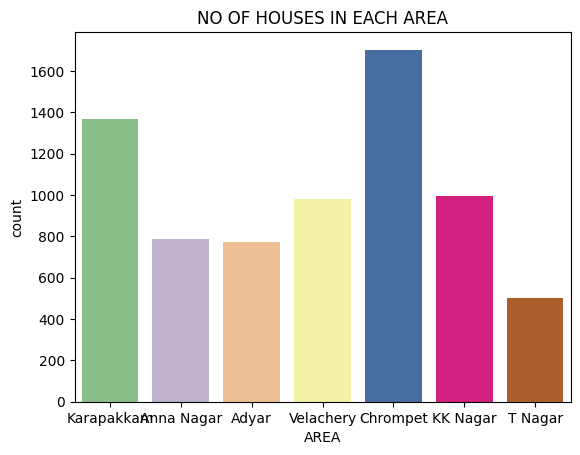

In [196]:
## Area
sns.countplot(data=selected_df, x='AREA', palette='Accent');
plt.title('NO OF HOUSES IN EACH AREA')
plt.show()

##### As we can infer Chrompet has the highest sale of houses followed by Karapakkam whilst T Nagar has the lowest sales. Let's visualise how might the sales_prices against the area.

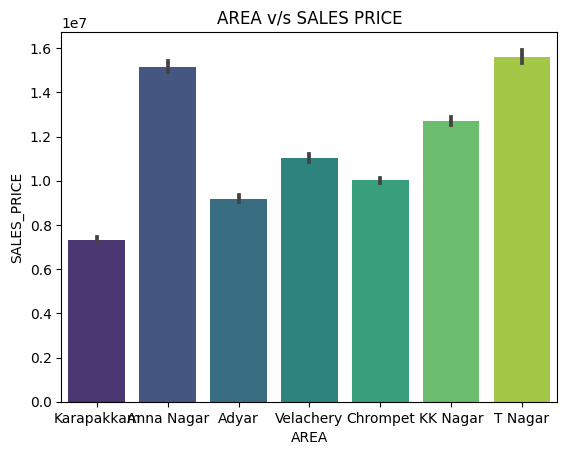

In [197]:
sns.barplot(data=selected_df, x = 'AREA', y="SALES_PRICE",palette='viridis');
plt.title('AREA v/s SALES PRICE')
plt.show()

##### we can clearly see that the Area with highest sales are cheaper viz Chrompet & Karapakkam whereas T nagar has had lowest sales owing to soaring high prices. <br/> However, house sales are highly affected by the bedrooms, let's visualise the same below.

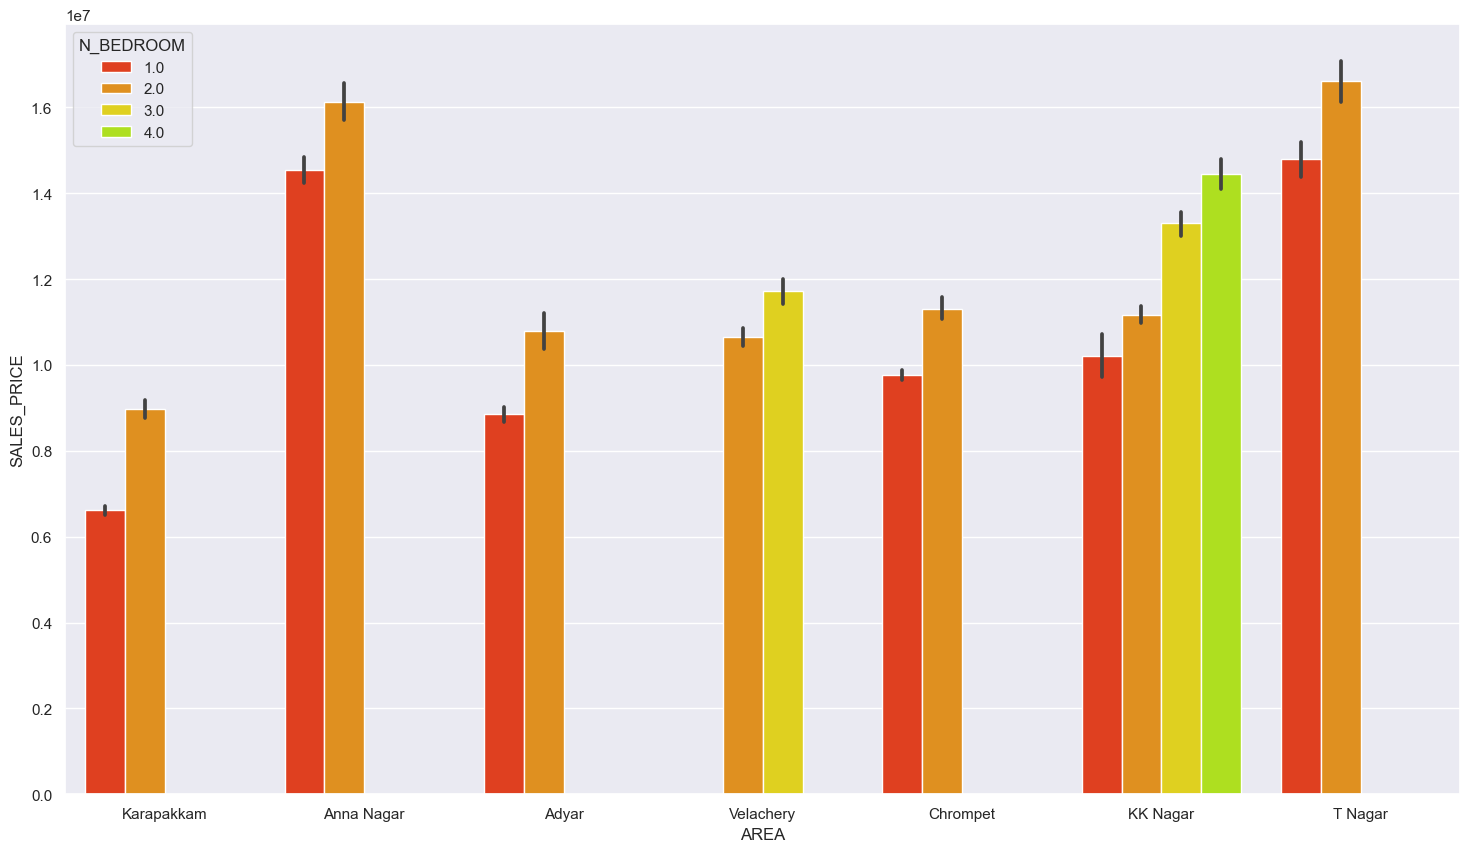

In [230]:

plt.figure(figsize=(18,10))
sns.barplot(data=selected_df,x = 'AREA',y="SALES_PRICE",hue='N_BEDROOM',palette='prism')
plt.show()

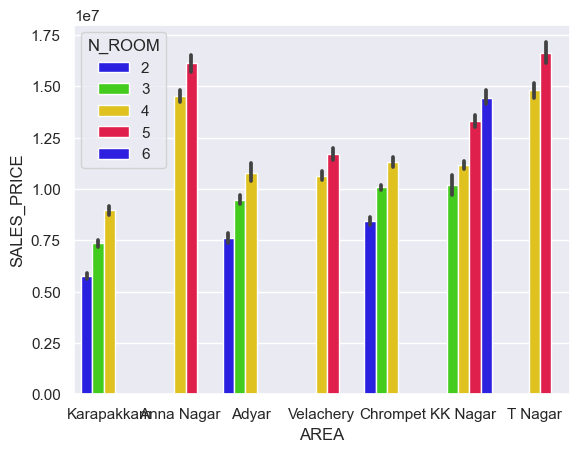

In [231]:
## check with the Rooms in general
sns.barplot(data=selected_df,x = 'AREA',y="SALES_PRICE",hue='N_ROOM',palette='prism')
plt.show()

<AxesSubplot: xlabel='AREA', ylabel='SALES_PRICE'>

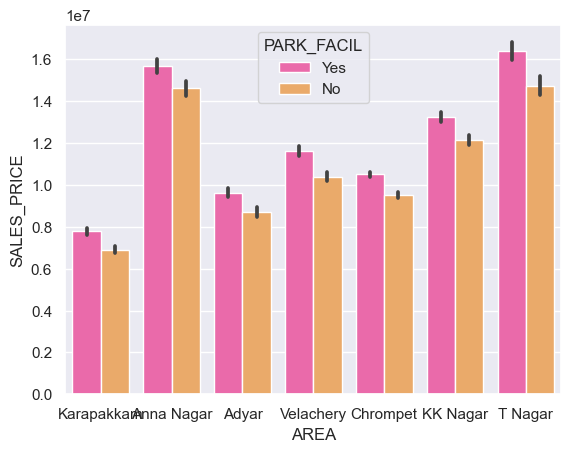

In [232]:
sns.barplot(data=selected_df,x = 'AREA',y="SALES_PRICE",hue='PARK_FACIL',palette='spring')

<AxesSubplot: xlabel='AREA', ylabel='SALES_PRICE'>

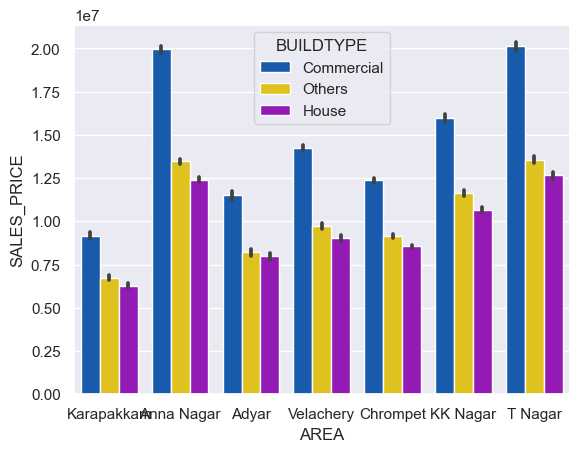

In [233]:
sns.barplot(data=selected_df,x = 'AREA',y="SALES_PRICE",hue='BUILDTYPE',palette='prism')

<AxesSubplot: xlabel='AREA', ylabel='INT_SQFT'>

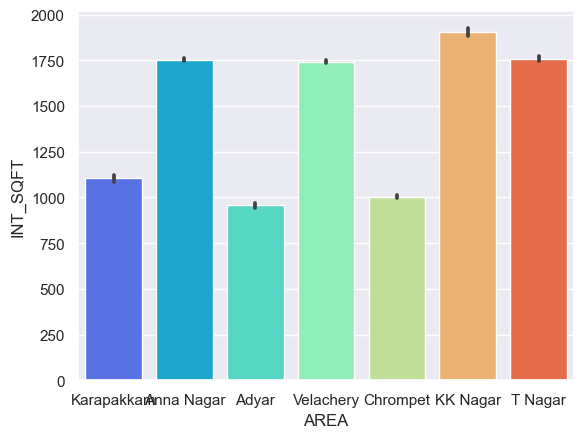

In [234]:
sns.barplot(data=selected_df,x = 'AREA',y='INT_SQFT',palette='rainbow')

<AxesSubplot: xlabel='AREA', ylabel='SALES_PRICE'>

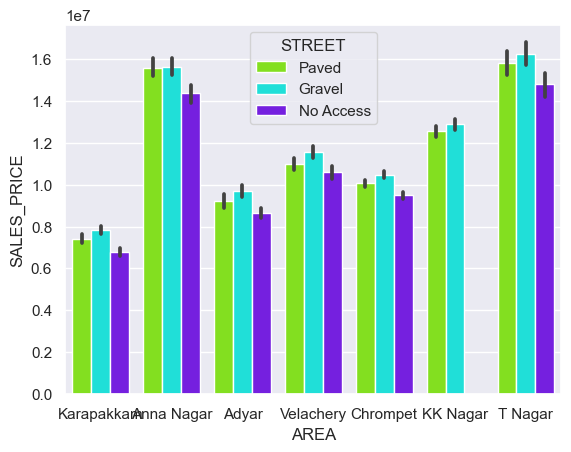

In [235]:
sns.barplot(data=selected_df,x = 'AREA',y="SALES_PRICE",hue='STREET',palette='hsv')

<AxesSubplot: xlabel='AREA', ylabel='QS_OVERALL'>

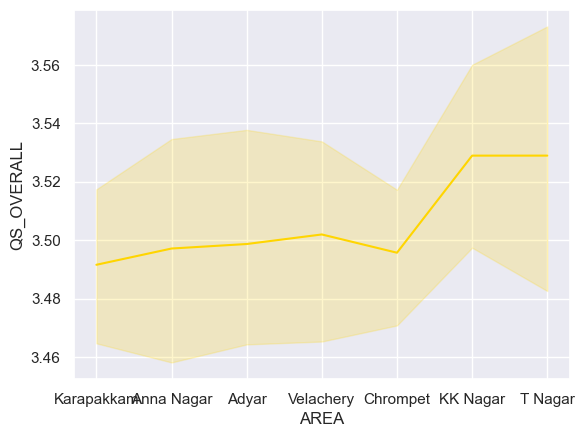

In [236]:
sns.lineplot(data= selected_df,x= 'AREA',y='QS_OVERALL')

From above analysis we understand following points

1.Chrompet and karapakkam have more no. of houses as compared to other areas.

2.Price of houses are higher in T nagar followed by anna nagar.

3.Floor area in sqft. is more in KK nagar. Velachery,T nagar and anna nagr have houses of same areas which is less than kk nagar.

4 . Commercial type of building getting more price than houses in all localities. Anna nagar and T nagar has highest price for Commercial type of buildings.

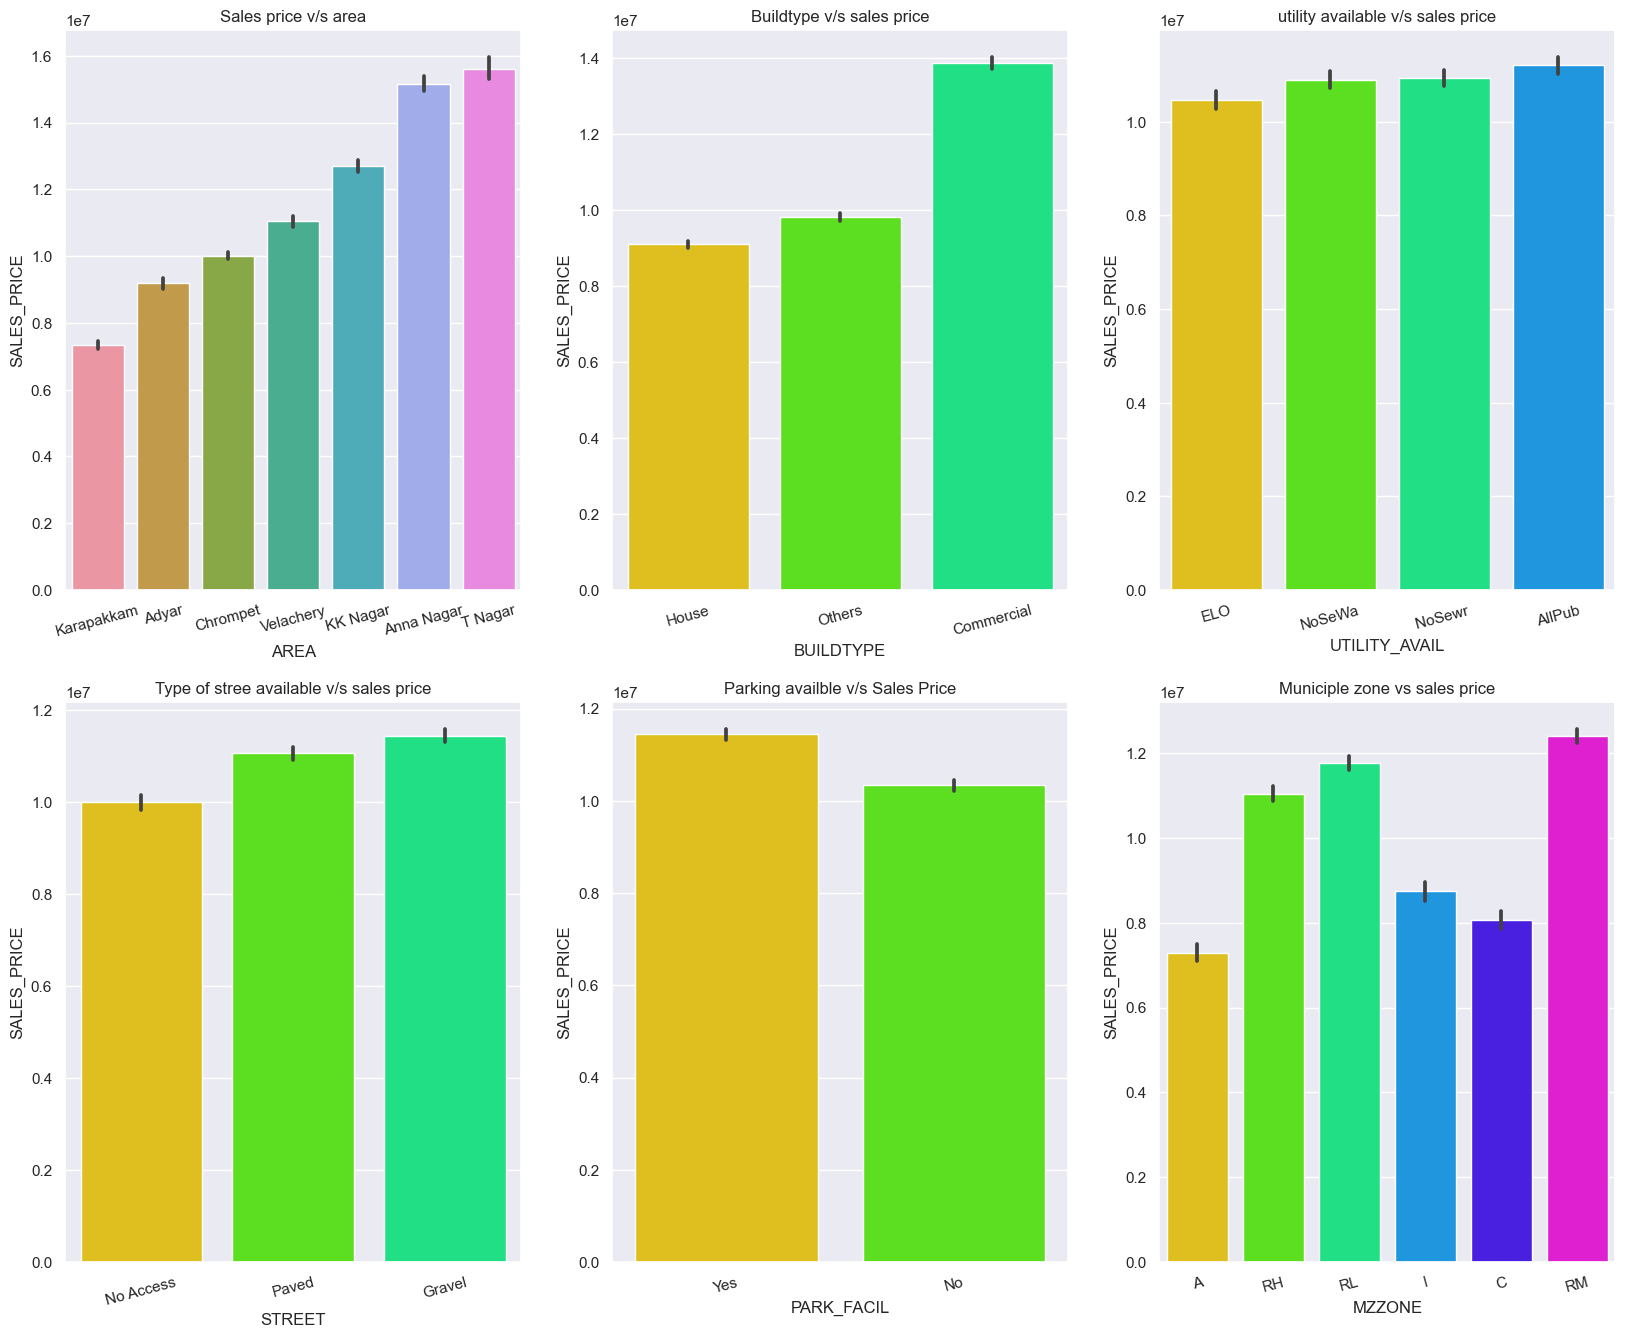

In [237]:
sns.set_theme(style="darkgrid",palette="hsv")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=selected_df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('Sales price v/s area')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=selected_df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('Buildtype v/s sales price')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=selected_df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('utility available v/s sales price')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=selected_df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('Type of stree available v/s sales price')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=selected_df)
plt.xticks(rotation=15)
plt.title('Parking availble v/s Sales Price')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=selected_df)
plt.xticks(rotation=15)
plt.title('Municiple zone vs sales price')
plt.show()

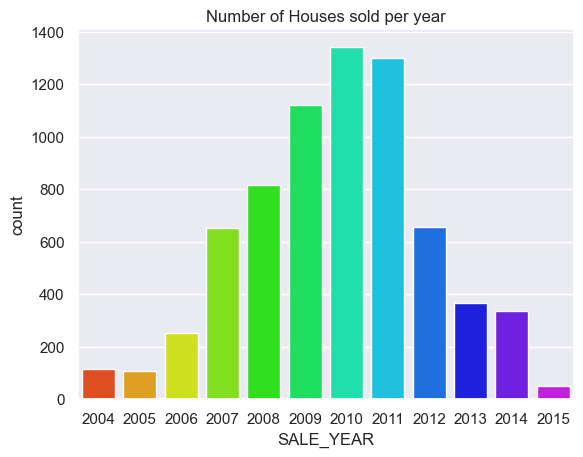

In [238]:
sns.countplot(data=selected_df, x='SALE_YEAR', palette='gist_rainbow')
plt.title("Number of Houses sold per year")
plt.show()

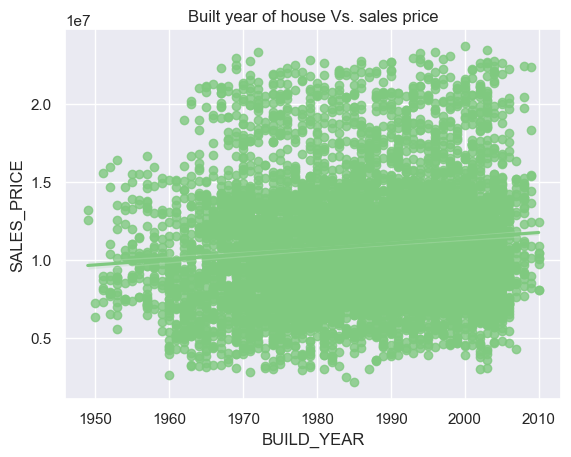

In [239]:
sns.set_palette('Accent')
ax = sns.regplot(data=selected_df, x='BUILD_YEAR', y='SALES_PRICE')
plt.title("Built year of house Vs. sales price")
plt.show()

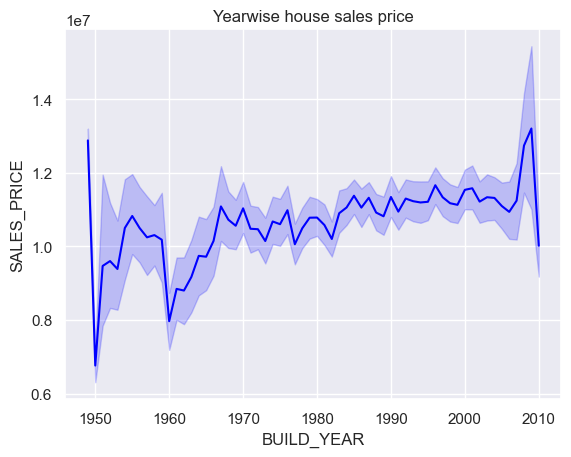

In [241]:
sns.lineplot(data=selected_df, x='BUILD_YEAR', y='SALES_PRICE', color='blue')
plt.title("Yearwise house sales price")
plt.show()

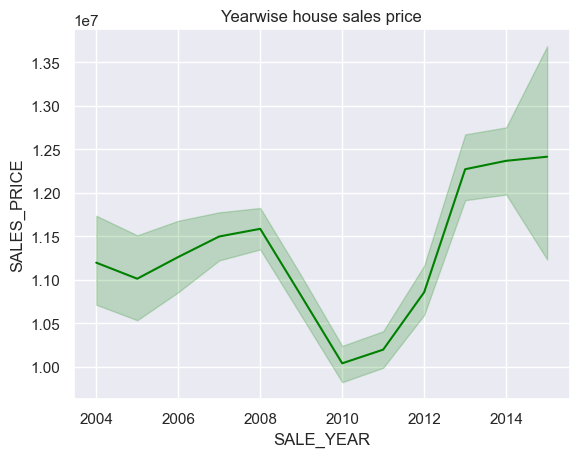

In [243]:
sns.lineplot(data=selected_df, x='SALE_YEAR', y='SALES_PRICE', color='green')
plt.title("Yearwise house sales price")
plt.show()

<AxesSubplot: xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

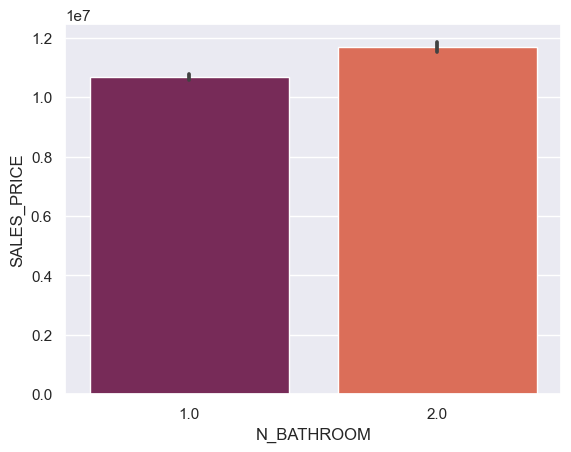

In [248]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=selected_df,palette = 'rocket',order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])


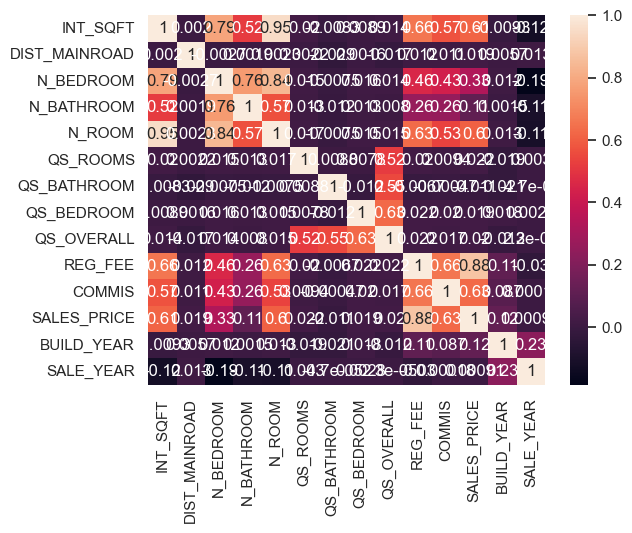

In [244]:
sns.heatmap(df.corr(),annot= True);


<Figure size 1700x800 with 0 Axes>

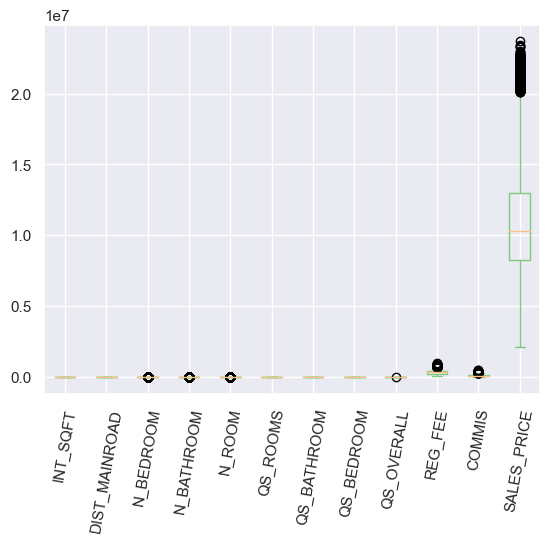

In [245]:
plt.figure(figsize=(17,8))
num_col.plot.box(grid = True);
plt.xticks(rotation =80);
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SALES_PRICE'>

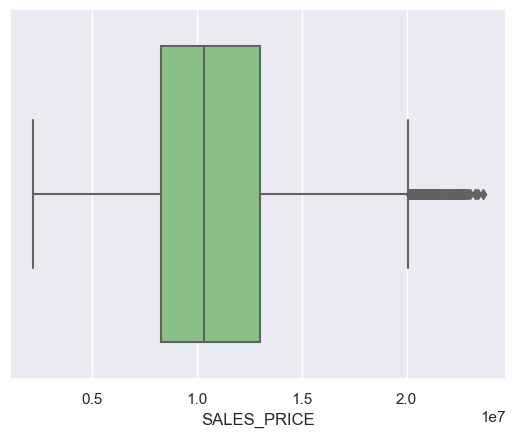

In [246]:
sns.boxplot(df.SALES_PRICE)

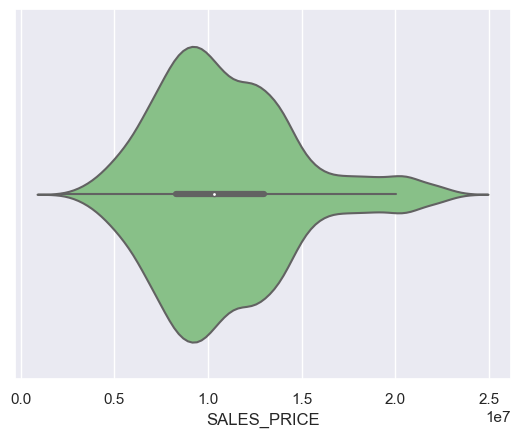

In [247]:
sns.violinplot(x='SALES_PRICE', data=selected_df)
plt.show()

We can see that only sales_price has outliers, but we can't remove them as it would be counter intuitive

In [ ]:
## Inferences obtained
1. T Nagar has highest avg ,selling price and karapakkam has lowest avg selling price. so concentration of house is more in area having low price homes.

2. Commercial building prices are higher than residential buildings.

3. utilities does not seem to affect too much on sales price. 

4. houses having paved and gravel road around it has little bit costlier.

5. building with parking facility does not affect on sales price too much.

6. RM,RL,RH zones having higher house cost than other zones.

7. More the no. rooms more the price.

8. higher floor area,higher the sales price

## Data Preprocessing 

In [249]:
selected_df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,1967,2011
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1995,2006
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1992,2012
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,1988,2010
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,1979,2009


In [250]:
selected_df.keys()

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR'],
      dtype='object')

In [268]:
from sklearn.preprocessing import LabelEncoder

In [269]:
le = LabelEncoder()

In [270]:
cat_col.keys()

Index(['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [271]:
selected_df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
selected_df['AREA']=le.fit_transform(df['AREA'])
selected_df['SALE_COND']=le.fit_transform(df['SALE_COND'])
selected_df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
selected_df['STREET']=le.fit_transform(df['STREET'])
selected_df['MZZONE']=le.fit_transform(df['MZZONE'])

In [273]:
selected_df.STREET.head()

0    2
1    0
2    0
3    2
4    0
Name: STREET, dtype: int32

#### One Hot Encoding

In [275]:
selected_df = pd.get_dummies(selected_df)

In [277]:
selected_df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,SALE_YEAR,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,4,6.911747,1.0,1.0,3,0,1,0,2,0,7600000,1967,2011,1,0,0
1,1,7.593878,2.0,1.0,5,0,0,0,0,3,21717770,1995,2006,1,0,0
2,0,6.812345,1.0,1.0,3,0,1,1,0,4,13159200,1992,2012,1,0,0
3,6,7.525640,3.0,2.0,5,2,0,3,2,2,9630290,1988,2010,0,0,1
4,4,7.111512,1.0,1.0,3,0,1,0,0,1,7406250,1979,2009,0,0,1


In [272]:
selected_df.shape

(7109, 14)

In [252]:
#dropping unwanted columns
selected_df.drop(['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL'],axis=1,inplace =True)

In [278]:
selected_df.to_csv('../data/PROCESSED_CHENNAI.csv',index=False)

In [281]:
df = pd.read_csv("../data/PROCESSED_CHENNAI.csv")

In [282]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,SALE_YEAR,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,4,6.911747,1.0,1.0,3,0,1,0,2,0,7600000,1967,2011,1,0,0
1,1,7.593878,2.0,1.0,5,0,0,0,0,3,21717770,1995,2006,1,0,0
2,0,6.812345,1.0,1.0,3,0,1,1,0,4,13159200,1992,2012,1,0,0
3,6,7.525640,3.0,2.0,5,2,0,3,2,2,9630290,1988,2010,0,0,1
4,4,7.111512,1.0,1.0,3,0,1,0,0,1,7406250,1979,2009,0,0,1


In [283]:
df.shape

(7109, 16)

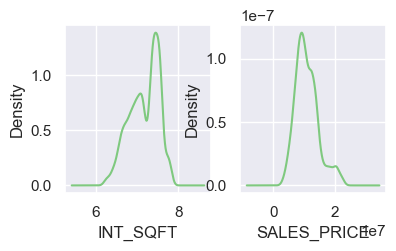

In [284]:
plt.figure()
plt.subplot(231)
plt.xlabel("INT_SQFT")
df.INT_SQFT.plot(kind='kde')
plt.subplot(232)
df.SALES_PRICE.plot(kind='kde')
plt.xlabel('SALES_PRICE')
plt.show()


see how the distribution is not proper, let's perform log transofrmation on this

In [285]:
import numpy as np
df['INT_SQFT'] = np.log(df.INT_SQFT)

Text(0.5, 1.0, 'INT_SQFT distribution after log tranceformation')

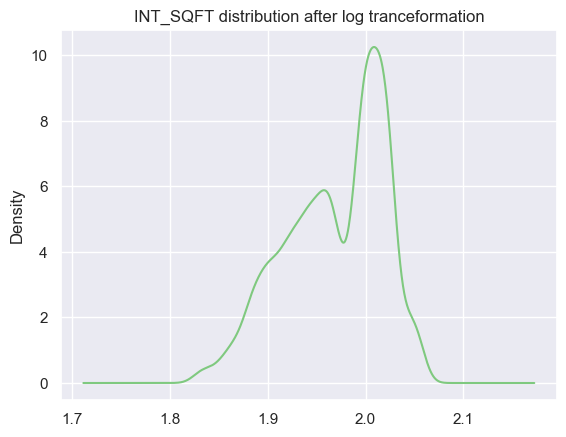

In [286]:
df.INT_SQFT.plot(kind = 'kde') 
plt.title('INT_SQFT distribution after log tranceformation')

### Model Building 

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X = selected_df.drop(['SALES_PRICE'],axis=1)

In [289]:
y = selected_df.SALES_PRICE

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle = True, random_state =45,test_size=0.2)

### Feature Scaling
<br/>
Feature scaling is a preprocessing step in machine learning that involves adjusting the scale of input features to a similar range

In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
scl = StandardScaler()

In [293]:
X_train =scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## Model 1 : Simple Linear Regression

In [295]:
from sklearn.linear_model import LinearRegression

In [296]:
lr = LinearRegression().fit(X_train,y_train)

In [297]:
y_pred =lr.predict(X_test)

In [298]:
from sklearn import metrics

In [299]:
lr_score = metrics.r2_score(y_test,y_pred)
lr_mae = metrics.mean_absolute_error(y_test,y_pred)

In [302]:
print("Score on Train data: {:.2f}".format(lr.score(X_train, y_train)))
print("Score on Test data: {:.2f}".format(lr.score(X_test, y_test)))
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

Score on Train data: 0.89
Score on Test data: 0.89
R2 score: 0.89
MSE: 1555858381141.79
MAE: 952258.90


In [306]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head()

,actual,predicted
4792,9689125,9.796492e+06
3229,8604850,9.403276e+06
2656,7099500,5.507980e+06
862,5999250,6.933388e+06
1387,13791820,1.339278e+07


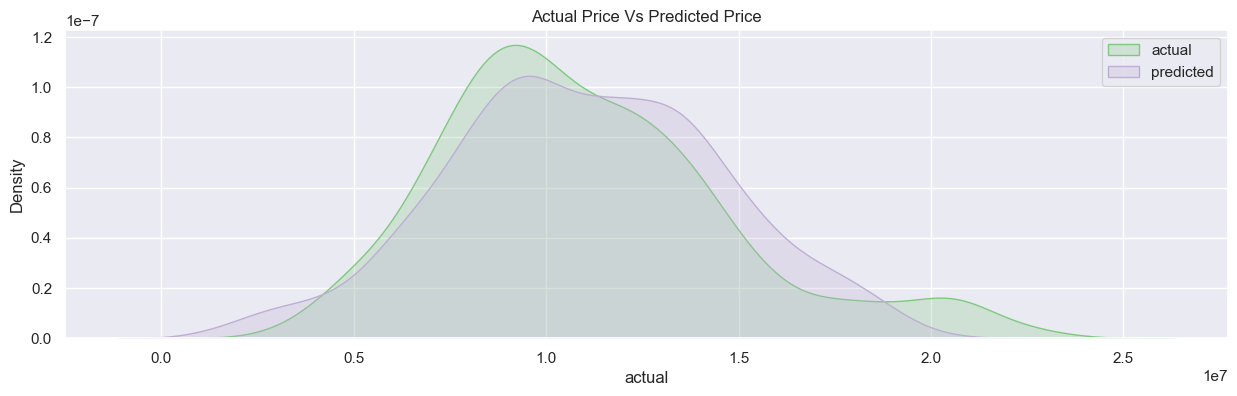

In [308]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

### KNN Regressor

In [311]:
from sklearn.neighbors import KNeighborsRegressor

In [312]:
knn_reg = KNeighborsRegressor().fit(X_train,y_train)

In [313]:
knn_pred = knn_reg.predict(X_test)

In [314]:
print("KNN regressor train score: {:.2f}".format(knn_reg.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_reg.score(X_test, y_test)))

KNN regressor train score: 0.95
KNN regressor test score: 0.93


### Cross validation for knn regression

In [316]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold

In [317]:
# Cross validation of knn

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)

knn_search.fit(X,y)

print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)

Best parameter: {'n_neighbors': 5}
Best score:  0.5990783363854141


In [318]:
knn_regressor = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)

knn_score = metrics.r2_score(y_test, knn_ypred)
knn_mae = metrics.mean_absolute_error(y_test, knn_ypred)

print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))
print("KNN r2 score: {:.2f}".format(knn_score))

KNN regressor train score: 0.95
KNN regressor test score: 0.93
KNN r2 score: 0.93


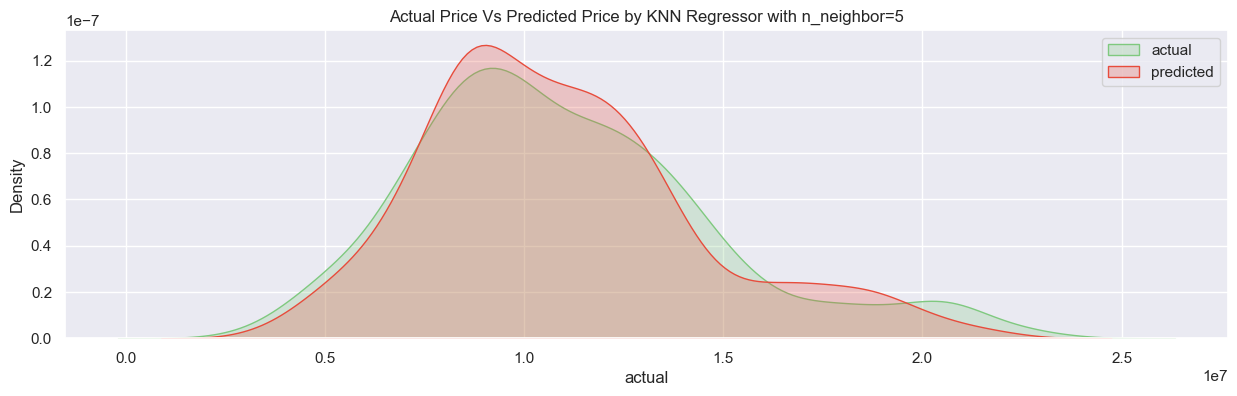

In [319]:
knn_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': knn_ypred.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=knn_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by KNN Regressor with n_neighbor=5")
plt.legend()
plt.show()

### Decision Tree Regressor

In [321]:
from sklearn.tree import DecisionTreeRegressor

In [322]:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)

In [323]:
# score
dt_score = metrics.r2_score(y_test, dt_y_predict)
dt_mae = metrics.mean_absolute_error(y_test, dt_y_predict)

print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))

print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.97
DT Test score: 0.96

DT R2 score: 0.96
DT MSE: 608817834906.26
DT MAE: 628380.50


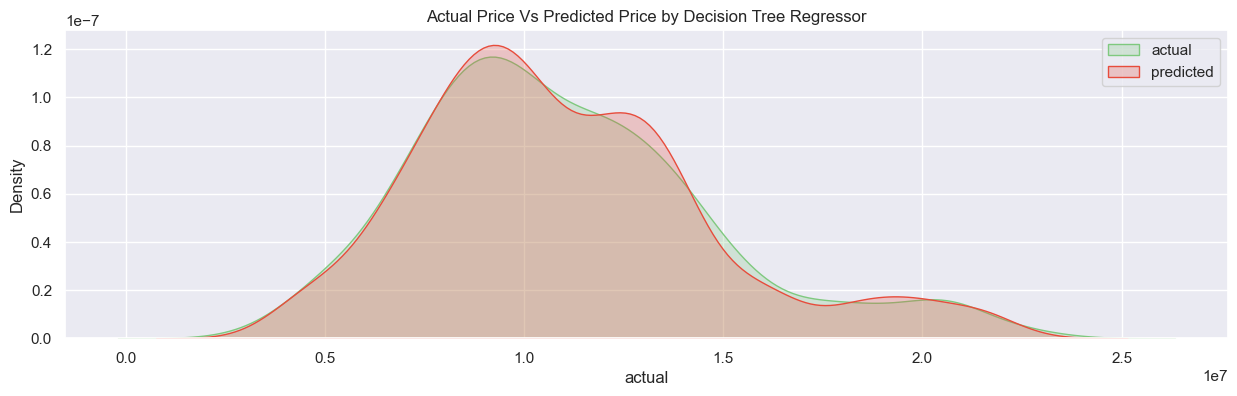

In [324]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': dt_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plt.legend()
plt.show()


In [325]:
dt_coefficient = pd.Series(dt_regressor.feature_importances_, index=X.columns.tolist())

In [326]:
dt_coefficient.sort_values(ascending=False)

INT_SQFT                0.398797
BUILDTYPE_Commercial    0.322450
MZZONE                  0.115356
AREA                    0.111004
N_BEDROOM               0.026765
PARK_FACIL              0.014244
STREET                  0.005061
BUILDTYPE_House         0.001995
BUILDTYPE_Others        0.001771
N_BATHROOM              0.001320
BUILD_YEAR              0.001004
SALE_COND               0.000103
N_ROOM                  0.000070
SALE_YEAR               0.000050
UTILITY_AVAIL           0.000009
dtype: float64

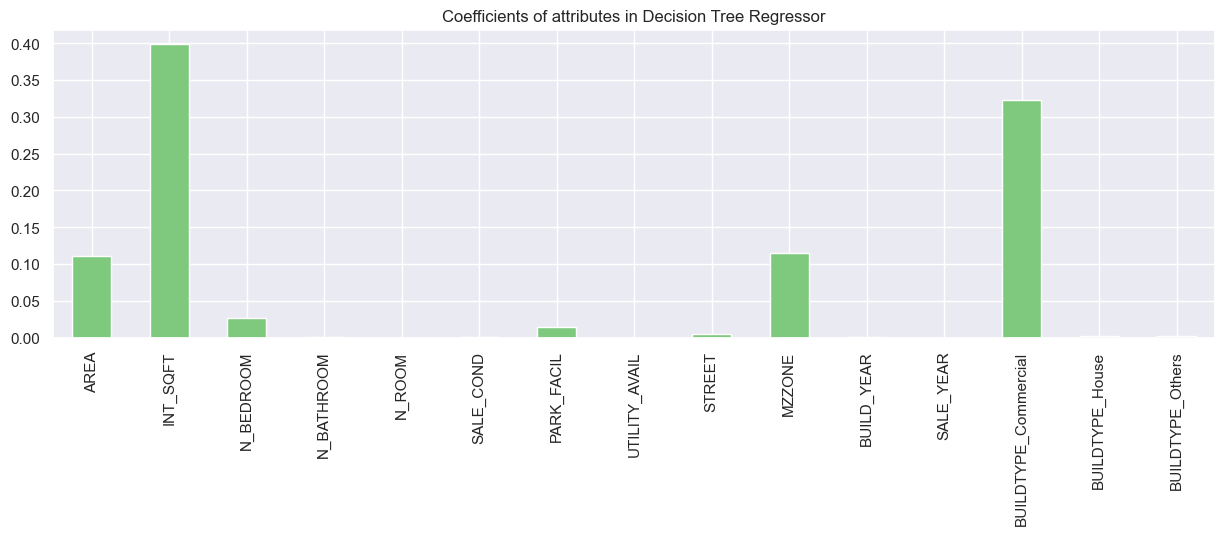

In [327]:
# coefficients

plt.figure(figsize=(15, 4))
dt_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in Decision Tree Regressor")
plt.show()

### Random Forest Regressor

In [328]:
from sklearn.ensemble import RandomForestRegressor

In [329]:
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)

rf_y_predict = rf_regressor.predict(X_test)


# score
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 1.00
RF Test score: 0.99

RF R2 score: 0.99
RF MSE: 198079464582.74
RF MAE: 351182.61


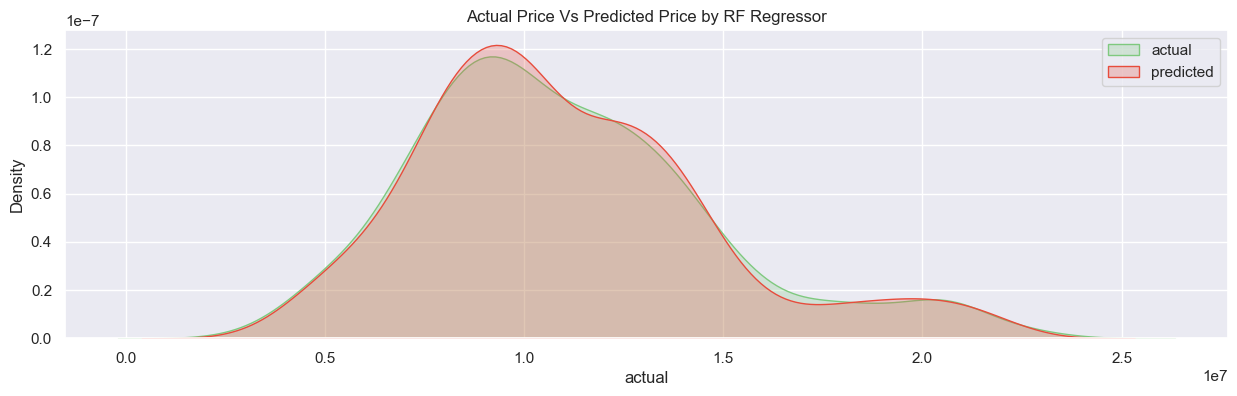

In [330]:


rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': rf_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

#### Cross validation of random forest regressor

In [331]:
rf_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,10),
        'n_estimators': (90,100),
        'random_state': [0,20,30]
    },
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0,
    n_jobs=-1
)

grid_result = rf_search.fit(X,y)

In [332]:

print("Best estimator for RF: {}".format(grid_result.best_estimator_))


Best estimator for RF: RandomForestRegressor(max_depth=9, random_state=20)


In [333]:
# initiating the model with best estimators
rf_regressor = RandomForestRegressor(max_depth=9, n_estimators=100, random_state=0)
# fit the model with training data
rf_regressor.fit(X_train, y_train)
# predict on X_test
rf_y_predict = rf_regressor.predict(X_test)

# score
rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 0.99
RF Test score: 0.98

RF R2 score: 0.98
RF MSE: 301853156030.73
RF MAE: 443009.10


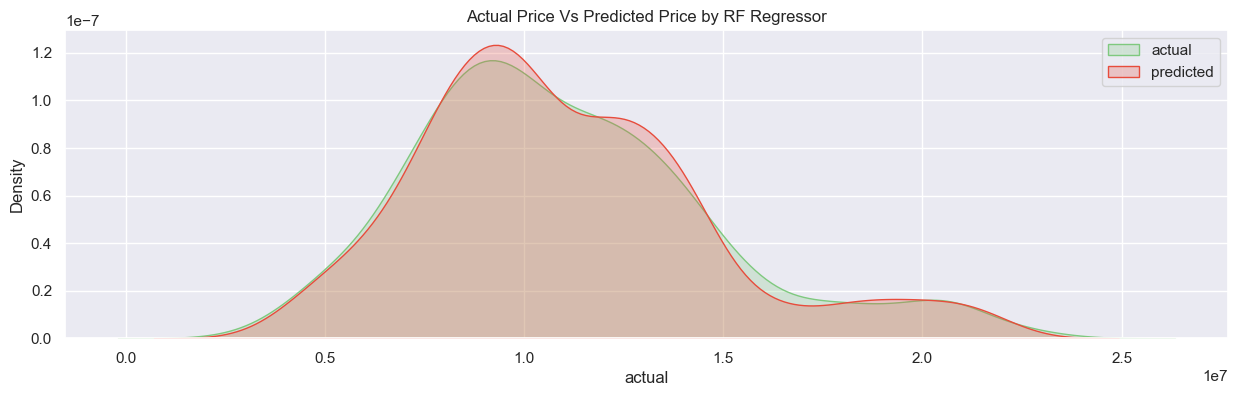

In [334]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': rf_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

In [335]:
# coefficients of random forest
rf_coefficient = pd.Series(rf_regressor.feature_importances_, index=X.columns.tolist())

rf_coefficient.sort_values(ascending=False)

INT_SQFT                0.403556
BUILDTYPE_Commercial    0.315299
MZZONE                  0.120583
AREA                    0.086641
N_BEDROOM               0.030358
PARK_FACIL              0.014092
N_BATHROOM              0.008170
STREET                  0.005903
N_ROOM                  0.005893
BUILD_YEAR              0.002993
BUILDTYPE_House         0.002228
BUILDTYPE_Others        0.001958
SALE_COND               0.000979
SALE_YEAR               0.000858
UTILITY_AVAIL           0.000491
dtype: float64

## Model comparison

In [336]:
models_df = pd.DataFrame({
    'model': "Linear KNN DecisionTree RandomForerst".split(),
    'r2_score': [lr_score, knn_score, dt_score, rf_score,],
    'mae': [lr_mae, knn_mae, dt_mae, rf_mae ]
})

models_df

,model,r2_score,mae
0,Linear,0.892123,952258.898826
1,KNN,0.928849,730013.936709
2,DecisionTree,0.957787,628380.502442
3,RandomForerst,0.979071,443009.102439


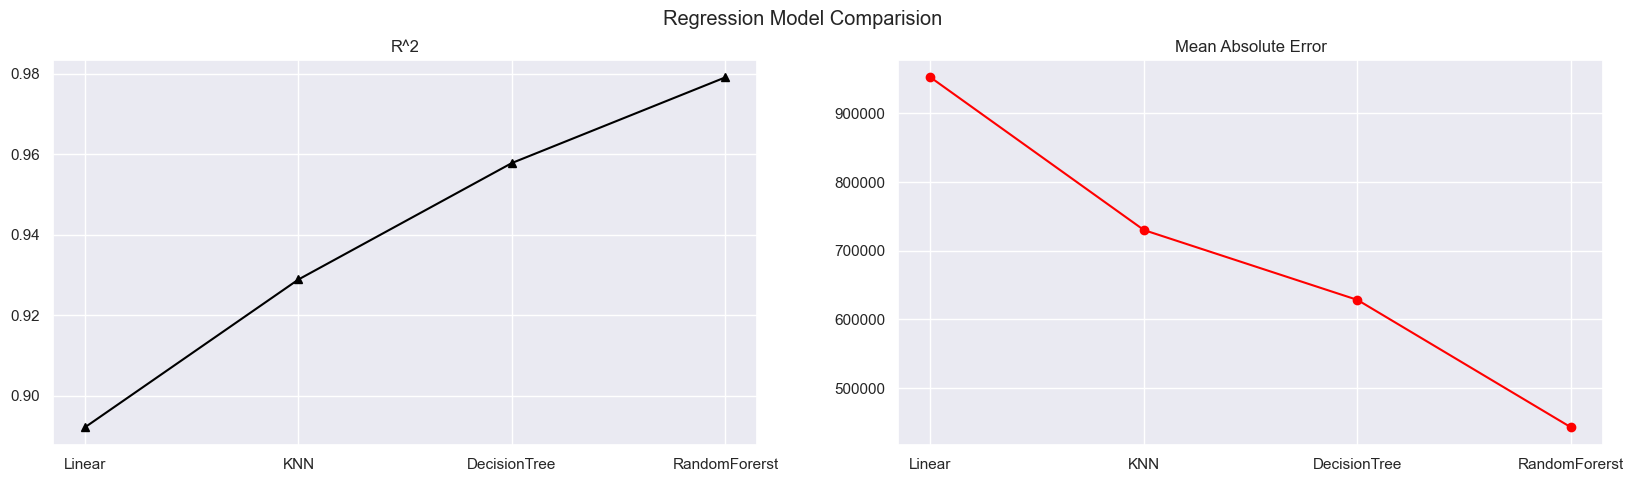

In [337]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Regression Model Comparision")
ax[0].plot(models_df.model, models_df.r2_score, color='black', marker='^')
ax[0].set_title("R^2")
ax[1].plot(models_df.model, models_df.mae, color='r', marker='o')
ax[1].set_title("Mean Absolute Error")
plt.show()

A higher R² score indicates better predictive performance.
Random Forest has the highest R² score (0.9791), followed by the Decision Tree, KNN, and Linear Regression in descending order.

 Lower MAE values indicate better model accuracy.
Random Forest has the lowest MAE (443,009.10), followed by the Decision Tree, KNN, and Linear Regression in descending order.

The Random Forest model outperforms the other models in both R² score and MAE. It achieves the highest R² score, indicating a strong ability to explain the variance in house prices, and it has the lowest MAE, signifying accurate predictions with smaller errors